In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import math
import numpy as np

In [3]:
df = pd.read_csv("movie_metadata.csv")

In [61]:
df.loc[df["gross"].isna(),["actor_1_name"]]#.head()
print(df.loc[df["gross"].isna(),["imdb_score"]].mean(),df.loc[~df["gross"].isna(),["imdb_score"]].mean())

imdb_score    6.311538
dtype: float64 imdb_score    6.469897
dtype: float64


In [8]:
df.columns,df.shape

(Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
        'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
        'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
        'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
        'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
        'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
        'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
        'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
       dtype='object'), (5043, 28))

In [6]:
df.isna().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [18]:
plt.hist(df["actor_1_facebook_likes"].apply(math.log))

ValueError: math domain error

In [23]:
df.loc[df["actor_1_facebook_likes"].isna(),"actor_1_facebook_likes"]

4502   NaN
4519   NaN
4720   NaN
4837   NaN
4945   NaN
4946   NaN
4990   NaN
Name: actor_1_facebook_likes, dtype: float64

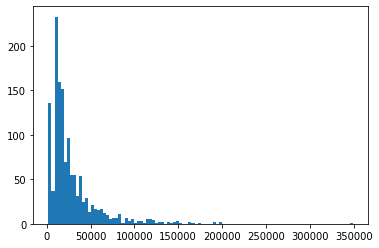

In [4]:
sub=df.loc[ ~( df["actor_1_facebook_likes"].isna()) & (df["actor_1_facebook_likes"]<100000)& (df["movie_facebook_likes"]>1000)& (df["imdb_score"]>4) ,]
plt.hist(sub["movie_facebook_likes"],bins=100)
plt.show()

In [50]:
sub.shape

(1330, 28)

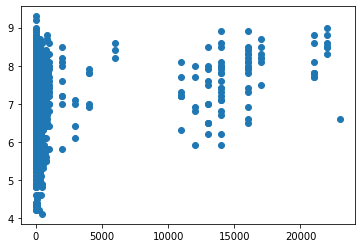

[[nan nan]
 [nan  1.]]


In [51]:
plt.scatter(sub["director_facebook_likes"],sub["imdb_score"])
plt.show()
print(np.corrcoef(sub["director_facebook_likes"],sub["imdb_score"]))

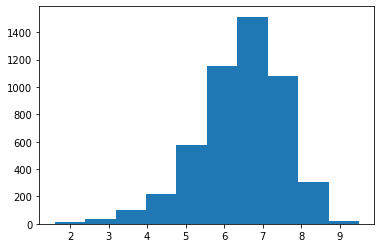

In [40]:
plt.hist(sub["imdb_score"])
plt.show()

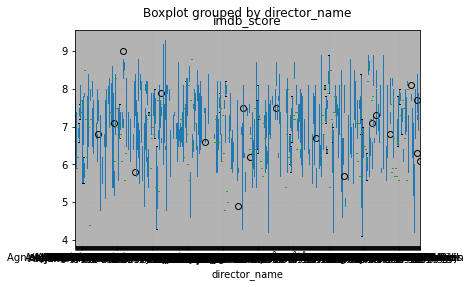

In [52]:
sub.boxplot(column="imdb_score",by="director_name")
plt.show()

In [54]:
len(sub["director_name"].unique())

702

In [7]:
df.loc[1,"content_rating"]#.hist()

'PG-13'

In [18]:
df["language"].describe()

count        5031
unique         47
top       English
freq         4704
Name: language, dtype: object